# Project exercises

### Test simulation code

In [ ]:
# 3d Lennard-Jones gas

# This block describes general features of the simulation:
#------------------------------------------------------------------------------
units lj # This command selects Lennard-Jones units, meaning that that lengths are measured in units of sigma, energies 
         # in units of epsilon, time in units of tau
dimension 3 # command specifies the dimensionality of the simulation: 2 or 3. Here we run a 3d simulation.
boundary p p p # command specifies boundary conditions to be applied. Here we have periodic boundaries in the x-, y-, 
               # and z- directions.
atom_style atomic # command specifies the complexity of the description of each atom/particle. Here, we will use the 
                  # simplest description, atomic, which is used for noble gases and coarse-grained simulation models.
#------------------------------------------------------------------------------

# This block sets up the dimensions of the 10 ◊ 10 ◊ 10 simulation box and fills the box with atoms with a given 
# packing fraction.
#-----------------------------------------------------------------------------
lattice fcc 0.01 # Command generates a lattice of points. This does, surprisingly enough, not actually generate any 
                 # atoms, it only generates a set of positions in space where atoms will be generated when
                 # we generate atoms. The type fcc specifies a three-dimensional lattice of face-centered-cubic shape.
region simbox block 0 10 0 10 0 10 # command defines a region which is a block extending over 0 < x < 10, 0 < y < 10, 
                                   # 0 < z < 10 We give this region the name simbox.
create_box 1 simbox # Command now actually creates the simulation box based on the spatial region we called simbox. 
                    # The simulation box will only contain 1 (one) type of atoms, hence the number 1.
create_atoms 1 box # Finally fills the simulation box we have defined using the lattice we have defined with atoms of 
                   # type 1.
#-----------------------------------------------------------------------------

# This block defines the material properties of the atoms and defines their initial velocities.
#-----------------------------------------------------------------------------
mass 1 1.0 # atoms of type 1 will have a mass of 1.0
velocity all create 10 711 dist gaussian # initial temperature for all atom 
                                         # types in the system is 10, 711 is the seed
#-----------------------------------------------------------------------------

# This block specifies the potential between the atoms.
#-----------------------------------------------------------------------------
pair_style lj/cut 3.0 # Specifing that we want to use a Lennard-Jones potential 
                      # with a cut-off that is of length 3.0.
pair_coeff 1 1 1.0 1.0 3.0 # The two first numbers, 1 1, specifies that we
                           # describe the interaction of atoms of type 1 with
                           # atoms of type 1.
#-----------------------------------------------------------------------------

fix 1 all nve # all atoms of type 1 have constant; number, volume, energy

# This block specifies simulation control, inclusing output and the number of time-steps to simulate.
#-----------------------------------------------------------------------------
dump 1 all custom 10 dump.lammpstrj id type x y z vx vy vz # command tells the simulator to output the state. The 1 is the 
                                                           # name we give this dump — it could also have been given a
                                                           # name such as mydump. We specify that all atoms are to be output
                                                           # using a custom output format, with output every 10 time-steps
                                                           # to the file dump.lammpstrj, and the ‘id type x y z vx vy vz’ 
                                                           # list specifies what is output per atom.
thermo 100 # command specifies that output to the Terminal and to the log file, log.lammps, is provided every 100 timesteps.
run 5000 # command starts the simulation and specifies that it will run for 5000 timesteps.
#-----------------------------------------------------------------------------

a) According to the central limit theorem, the velocity distribution of the
particles will eventually evolve into a Maxwell-Boltzmann distribution
independent of the initial conditions. Let us test this by starting the
simulation with velocities that are uniformly distributed random numbers
in the interval $[-v, v]$, for your own choice of $v$ (You will actually provide
the value of $T$ and not $v$). Look at the description of the ´velocity´
command in Lammps to see how to specify a uniform distribution.
Investigate the probability density for the velocities and for the speeds of
the atoms at a given time by writing the velocities to a file and visualizing
the results in a histogram. Study the time-development of the velocity
distribution to estimate how long time it takes for the velocities to reach
a Maxwell-Boltzmann distribution. Hint: You can find the histogram
$h_i(t)$ for a given set of bins of velocities, $v_i$. You can characterize the
time development of $h_i(t)$ by looking at the normalized inner product, $sum(h_i(t)h_i(t_n))/sum_i(h_i(t_n)h_i(t_n))$, where $t_n$ is the final time-step in your
simulation.

In [ ]:
# 3d Lennard-Jones gas
units lj
dimension 3
boundary p p p
atom_style atomic

lattice fcc 0.01
region simbox block 0 10 0 10 0 10
create_box 1 simbox
create_atoms 1 box

mass 1 1.0
velocity all create 2.5 711 dist uniform

pair_style lj/cut 3.0
pair_coeff 1 1 1.0 1.0 3.0

fix 1 all nve

dump 1 all custom 10 dump.project1_a id type x y z vx vy vz
thermo 100
run 5000

In [37]:
### inporting packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
file = pd.read_csv('dump.project1_a', header = None)
file.columns=['head']
file[0:11]

,head
0,ITEM: TIMESTEP
1,0
2,ITEM: NUMBER OF ATOMS
3,4000
4,ITEM: BOX BOUNDS pp pp pp
5,0.0000000000000000e+00 7.3680629972807722e+01
6,0.0000000000000000e+00 7.3680629972807722e+01
7,0.0000000000000000e+00 7.3680629972807722e+01
8,ITEM: ATOMS id type x y z vx vy vz
9,1 1 0 0 0 -5.34913 0.204397 -2.90262


In [39]:
## We need to split the stings and dropp unwanted columns
# splir
data = file['head'][9:].str.split(" ", n=-1, expand = True)

# creating new columns with with the desired data
data["id"] = data[0]
data["type"] = data[1]
data["x"] = data[2]
data["y"] = data[3]
data["z"] = data[4]
data["vx"] = data[5]
data["vy"] = data[6]
data["vz"] = data[7]

for i in range(11):
    # Dropping old columns
    data.drop(columns = [i], inplace = True)

In [40]:
# testing, and it works
data[0:10]

,id,type,x,y,z,vx,vy,vz
9,1,1,0,0,0,-5.34913,0.204397,-2.90262
10,5,1,7.36806,0,0,3.49294,0.830403,-5.3472
11,9,1,14.7361,0,0,1.40235,1.54569,-1.24878
12,13,1,22.1042,0,0,3.38018,3.30686,1.37445
13,17,1,29.4723,0,0,4.37001,-2.35683,5.19359
14,21,1,36.8403,0,0,-3.13769,2.30272,-4.55804
15,25,1,44.2084,0,0,-5.35354,2.39457,1.62326
16,29,1,51.5764,0,0,-1.87962,1.09867,-0.500753
17,33,1,58.9445,0,0,5.3803,-2.07814,-0.185031
18,37,1,66.3126,0,0,5.42839,-0.929795,-2.61781


In [41]:
## Saving the velocities of the atoms for each timestep 
# 50 timesteps and 4000 atoms
vx = np.zeros([50,4000])
vy = np.zeros([50,4000])
vz = np.zeros([50,4000])

for i in range(50):
    start_p = i*(4000 + 9)
    end_p = 4000 + i*(4000 + 9)
    
    vx[i,0:] = np.array(data['vx'][start_p:end_p])
    vy[i,0:] = np.array(data['vy'][start_p:end_p])
    vz[i,0:] = np.array(data['vz'][start_p:end_p])

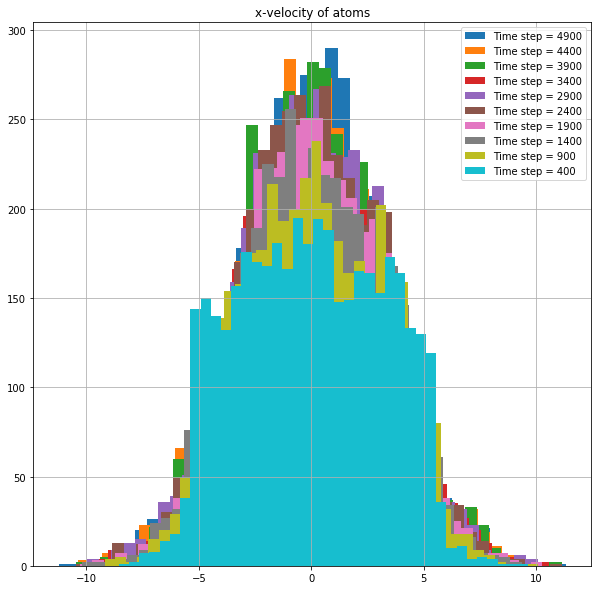

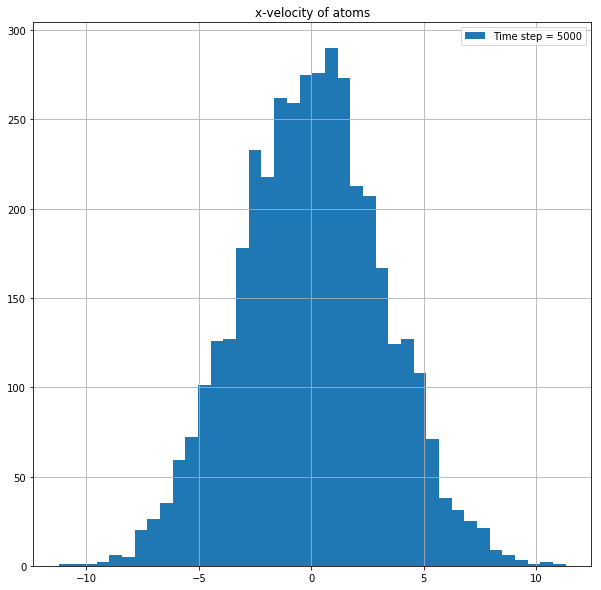

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(10):
    ax.hist(vx[49 - i*5,0:], 40, label='Time step = '+ str((49-i*5)*100))

ax.set_title('x-velocity of atoms')
ax.legend()
plt.grid()

# last
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(vx[49,0:], 40, label='Time step = 5000')
ax.set_title('x-velocity of atoms')
ax.legend()
plt.grid()

b) Find the total energy (kinetic and potential) of the system, $E(t)$, and
plot it as a function of time. How does the size of the fluctuations in
energy depend on the time-step $\Delta t$? (Hint: Use the ´timestep´ command
in Lammps to change the timestep in the simulation). Check a few values
of $\Delta t$ to ensure your choice provides reasonable results.
In general, it is not trivial to calculate the temperature for general
potential forms. The simplest estimate assumes equilibrium between
the translational and potential degrees of freedom. According to the
equipartition principle, the average total kinetic energy is
$$ \langle E_k\rangle = \frac{3}{2} Nk_BT$$
where $N$ is the number of atoms and $T$ is our estimate for the system
temperature.

c) Use this method to measure the temperature as a function of time, $T(t)$. (Don’t forget to equilibriate the system first). Find the average temperature of the system (after equilibration), and compare with the temperature you used to generate the initial velocity distribution. Characterize the fluctuations in temperature, and find how the fluctuations
vary with system size.\\
There are several ways of measuring the pressure $P$ of a many-atom
system. The method we will use, and which is implemented in Lammps,
is derived from the virial equation for the pressure. In a volume $V$ with
particle density $\rho = N/V$ , the average pressure is
$$P = \rho k_BT + \frac{1}{3V}\sum_{i<j} F_{ij} \cdot r_{ij} $$
where the sum runs over all interacting particle pairs. Note that this
expression depends on the ensemble – and is valid for the micro-canonical
ensemble only. The vector products should be computed and summed
up inside the force loops for efficiency.